## 机器学习和数据挖掘过程

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [3]:
## 获取数据
mydata = pd.read_csv("moonsdatas.csv")
print(mydata.head())

         X1        X2  Y
0  0.742420  0.585567  0
1  1.744439  0.039096  1
2  1.693479 -0.190619  1
3  0.739570  0.639275  0
4 -0.378025  0.974814  0


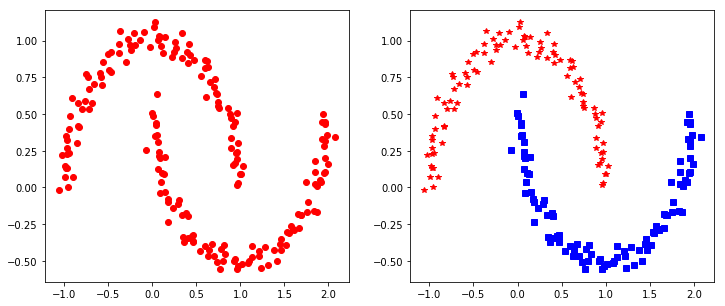

In [4]:
## 数据探索
plt.figure(figsize=(12,5))
## 可视化无监督学习的数据
plt.subplot(1,2,1)
plt.plot(mydata.X1,mydata.X2,"ro")

## 可视化有监督学习的数据
plt.subplot(1,2,2)
index0 = np.where(mydata.Y == 0)[0]
index1 = np.where(mydata.Y == 1)[0]
plt.plot(mydata.X1[index0],mydata.X2[index0],"r*")
plt.plot(mydata.X1[index1],mydata.X2[index1],"bs")
plt.show()

### 不考虑Y标签情况下的无监督学习

选择合适的聚类分析模型

In [6]:
## K均值聚类
_,k_label = kmeans2(mydata.iloc[:,0:2],k=2,iter=100)
## 密度聚类
db = DBSCAN(eps=0.2,min_samples=5)
mydb = db.fit_predict(mydata.iloc[:,0:2])

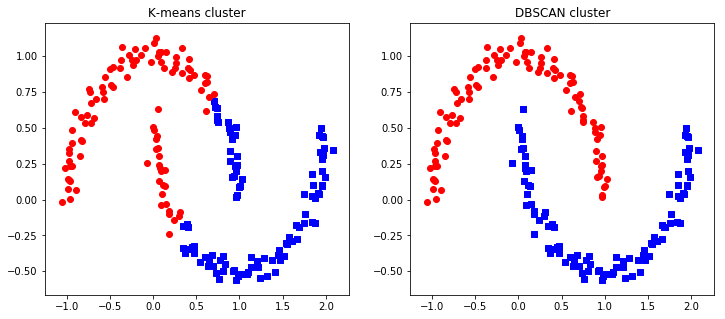

In [7]:
##  可视化两种聚类结果，便于挑选合适的模型
marker = ["o","s"]
color = ["r","b"]
kmarker = [marker[lab] for lab in k_label]
kcolor = [color[lab] for lab in k_label]
dbmarker = [marker[lab] for lab in mydb]
dbcolor = [color[lab] for lab in mydb]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for ii in np.arange(len(mydata.X1)):
    plt.scatter(mydata.X1[ii],mydata.X2[ii],
                c=kcolor[ii],marker = kmarker[ii])
plt.title("K-means cluster")    
plt.subplot(1,2,2)
for ii in np.arange(len(mydata.X1)):
    plt.scatter(mydata.X1[ii],mydata.X2[ii],
                c=dbcolor[ii],marker = dbmarker[ii])
plt.title("DBSCAN cluster")    
plt.show()

### 考虑Y标签情况下的有监督学习

使用Logistic回归

In [8]:
## 数据切分为训练集和测试集
mydata = np.array(mydata)
train_x,test_x,train_y,test_y = train_test_split(mydata[:,0:2],mydata[:,2],test_size=0.3,random_state = 123)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(140, 2)
(140,)
(60, 2)
(60,)


In [12]:
## 定义logostic模型
logr = LogisticRegression()
## 训练模型
logr.fit(train_x,train_y)
## 预测测试集
prey = logr.predict(test_x)
## 计算模型的分类效果
metrics.accuracy_score(test_y,prey)

0.90000000000000002

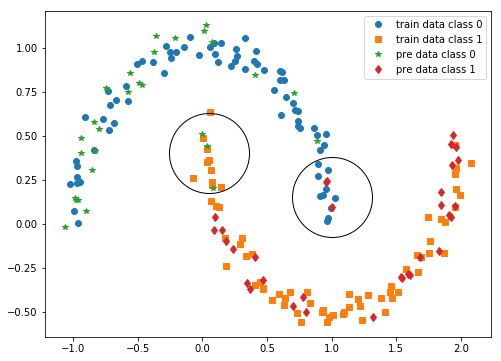

In [30]:
## 可视化模型的识别过程
plt.figure(figsize=(8,6))
## 可视化训练数据
index0 = np.where(train_y == 0)[0]
index1 = np.where(train_y == 1)[0]
plt.plot(train_x[index0,0],train_x[index0,1],"o",label = "train data class 0")
plt.plot(train_x[index1,0],train_x[index1,1],"s",label = "train data class 1")
## 可视化测试数据
index0 = np.where(prey == 0)[0]
index1 = np.where(prey == 1)[0]
plt.plot(test_x[index0,0],test_x[index0,1],"*",label = "pre data class 0")
plt.plot(test_x[index1,0],test_x[index1,1],"d",label = "pre data class 1")
## 圈出易识别错误的样本位置
plt.plot((0.05), (0.4), "ko",markersize=80,markerfacecolor = "none")
plt.plot((1), (0.15), "ko",markersize=80,markerfacecolor = "none")
plt.legend(loc = 0)
plt.show()